In [2]:
import pandas as pd

# Load the Excel file
file_path = "EDA_census.xlsx"
xls = pd.ExcelFile(file_path)

# Load the sheet named 'C-08' into a DataFrame
df = pd.read_excel(xls, sheet_name='C-08')

# Drop initial rows that are metadata and set proper column names
df_cleaned = df.iloc[4:].reset_index(drop=True)

# Assign new column names based on their position
df_cleaned.columns = [
    "Table_Name", "State_Code", "District_Code", "Area_Name", "Population_Type",
    "Age_Group", "Total_Population_Persons", "Total_Population_Males", "Total_Population_Females",
    "Illiterate_Persons", "Illiterate_Males", "Illiterate_Females",
    "Literate_Persons", "Literate_Males", "Literate_Females"
] + list(df_cleaned.columns[15:])  # Keep remaining columns

# Keep only relevant columns
df_cleaned = df_cleaned[["State_Code", "District_Code", "Area_Name", "Population_Type",
                         "Age_Group", "Total_Population_Persons", "Total_Population_Males", "Total_Population_Females",
                         "Illiterate_Persons", "Illiterate_Males", "Illiterate_Females",
                         "Literate_Persons", "Literate_Males", "Literate_Females"]]

# Drop any rows where State_Code is NaN (removes potential leftover headers)
df_cleaned = df_cleaned.dropna(subset=["State_Code"])

# Save as CSV for further analysis
csv_path = "Cleaned_Census_Data.csv"
df_cleaned.to_csv(csv_path, index=False)

# Display first few rows
print(df_cleaned.head())

  State_Code District_Code Area_Name Population_Type Age_Group  \
2         00           000     INDIA           Total  All ages   
3         00           000     INDIA           Total       0-6   
4         00           000     INDIA           Total         7   
5         00           000     INDIA           Total         8   
6         00           000     INDIA           Total         9   

  Total_Population_Persons Total_Population_Males Total_Population_Females  \
2               1210854977              623270258                587584719   
3                164515253               85752254                 78762999   
4                 24826640               12903364                 11923276   
5                 26968373               14061937                 12906436   
6                 23424638               12214985                 11209653   

  Illiterate_Persons Illiterate_Males Illiterate_Females Literate_Persons  \
2          447216165        188506636          258709529 

In [3]:
import pandas as pd

# Load the cleaned data
csv_path = "Cleaned_Census_Data.csv"
df_cleaned = pd.read_csv(csv_path)

# Filter data for India and age group 20-24
df_age_20_24 = df_cleaned[(df_cleaned["Area_Name"] == "INDIA") & (df_cleaned["Age_Group"] == "20-24")]

# Convert relevant columns to numeric values
df_age_20_24[["Total_Population_Females", "Illiterate_Females"]] = df_age_20_24[
    ["Total_Population_Females", "Illiterate_Females"]
].apply(pd.to_numeric, errors="coerce")

# Calculate the percentage of illiterate females in this age group
illiterate_females = df_age_20_24["Illiterate_Females"].sum()
total_females = df_age_20_24["Total_Population_Females"].sum()

illiteracy_percentage = (illiterate_females / total_females) * 100 if total_females > 0 else 0

# Print the result
print(f"Percentage of illiterate females (age 20-24) in India: {illiteracy_percentage:.2f}%")

Percentage of illiterate females (age 20-24) in India: 22.68%


/var/folders/q9/_3w68hr55rdcl70s4bt4jjbh0000gn/T/ipykernel_67516/3149971498.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_20_24[["Total_Population_Females", "Illiterate_Females"]] = df_age_20_24[


In [4]:
import pandas as pd

# Load the cleaned data
csv_path = "Cleaned_Census_Data.csv"
df_cleaned = pd.read_csv(csv_path)

# Convert necessary columns to numeric values
df_cleaned[["Total_Population_Persons", "Literate_Persons"]] = df_cleaned[
    ["Total_Population_Persons", "Literate_Persons"]
].apply(pd.to_numeric, errors="coerce")

# Group by Age Group and calculate literacy rate
age_literacy_rates = df_cleaned.groupby("Age_Group").agg(
    Total_Population=("Total_Population_Persons", "sum"),
    Literates=("Literate_Persons", "sum")
).reset_index()

# Calculate literacy rate
age_literacy_rates["Literacy_Rate"] = (age_literacy_rates["Literates"] / age_literacy_rates["Total_Population"]) * 100

# Display the literacy rate data
print(age_literacy_rates)

# Identify trends
young_group_rate = age_literacy_rates[
    age_literacy_rates["Age_Group"].isin(["7", "8", "9", "10", "11", "12", "13", "14", "15-19", "20-24", "25-29"])
]["Literacy_Rate"].mean()

old_group_rate = age_literacy_rates[
    age_literacy_rates["Age_Group"].isin(["55-59", "60-64", "65-69", "70-74", "75-79", "80+"])
]["Literacy_Rate"].mean()

# Checking if literacy rate increases continuously
increasing_trend = age_literacy_rates["Literacy_Rate"].is_monotonic_increasing

# Choose the correct statement
if old_group_rate > young_group_rate:
    result = "People in the old age group (above 55+) are more literate than other groups."
elif young_group_rate > old_group_rate:
    result = "People in the young age group (below 30) are more literate than the old age group (above 55+)."
elif increasing_trend:
    result = "The literacy rate increases for each age bucket from 7 years till 80+."
else:
    result = "None of the given options are completely correct."

# Print the final result
print(result)

         Age_Group  Total_Population   Literates  Literacy_Rate
0              0-6         658061012           0       0.000000
1               10         122208428   108390408      88.693071
2               11          98963784    91009892      91.962826
3               12         111509228   101943112      91.421234
4               13          97122732    89880828      92.543554
5               14         101032676    92629536      91.682750
6               15         103597816    93197988      89.961344
7               16          98369172    88319224      89.783437
8               17          84869868    76716048      90.392562
9               18         111832588    96920688      86.665872
10              19          83436352    73121656      87.637647
11           20-24         445696888   370978920      83.235699
12           25-29         405655860   315118100      77.681141
13           30-34         354379804   257061564      72.538435
14           35-39         340562736   2

TypeError: 'value' must be an instance of str or bytes, not a float

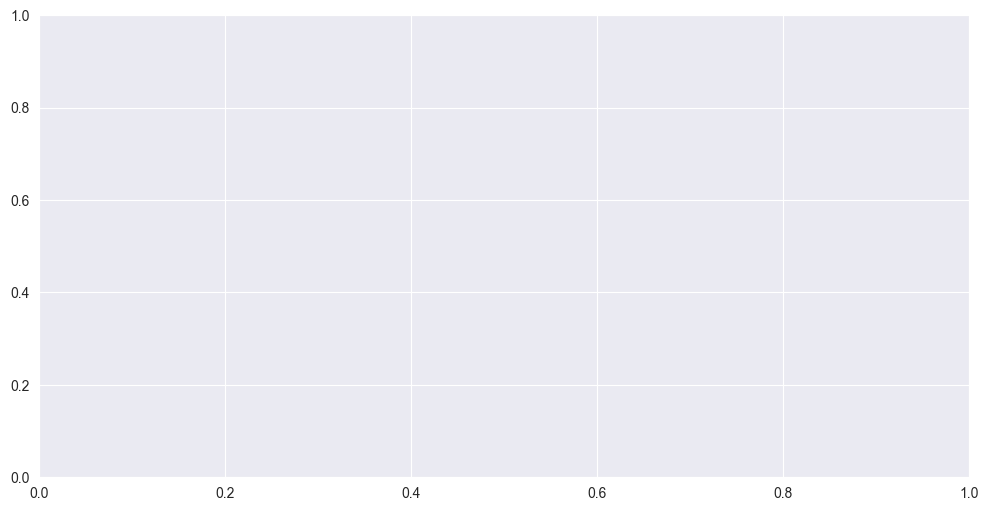

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
csv_path = "Cleaned_Census_Data.csv"
df_cleaned = pd.read_csv(csv_path)

# Convert necessary columns to numeric values
df_cleaned[["Total_Population_Persons", "Literate_Persons"]] = df_cleaned[
    ["Total_Population_Persons", "Literate_Persons"]
].apply(pd.to_numeric, errors="coerce")

# Group by Age Group and calculate literacy rate
age_literacy_rates = df_cleaned.groupby("Age_Group").agg(
    Total_Population=("Total_Population_Persons", "sum"),
    Literates=("Literate_Persons", "sum")
).reset_index()

# Calculate literacy rate
age_literacy_rates["Literacy_Rate"] = (age_literacy_rates["Literates"] / age_literacy_rates["Total_Population"]) * 100

# Drop NaN values in Age_Group to ensure proper plotting
age_literacy_rates = age_literacy_rates.dropna(subset=["Age_Group"])

# Convert Age_Group to string for proper sorting
age_literacy_rates["Age_Group"] = age_literacy_rates["Age_Group"].astype(str)

# Define proper order for age groups
age_order = [
    "7", "8", "9", "10", "11", "12", "13", "14", "15-19", "20-24", "25-29",
    "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69",
    "70-74", "75-79", "80+"
]

# Convert Age_Group to categorical type with ordering
age_literacy_rates["Age_Group"] = pd.Categorical(age_literacy_rates["Age_Group"], categories=age_order, ordered=True)

# Sort data by Age_Group after ensuring proper ordering
age_literacy_rates = age_literacy_rates.sort_values(by="Age_Group")

# Plot Literacy Rate by Age Group
plt.figure(figsize=(12, 6))
plt.plot(age_literacy_rates["Age_Group"], age_literacy_rates["Literacy_Rate"], marker="o", linestyle="-")

# Labels and title
plt.xlabel("Age Group")
plt.ylabel("Literacy Rate (%)")
plt.title("Literacy Rate by Age Group in India (Census Data)")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

In [7]:
import pandas as pd

# Load the cleaned data
csv_path = "Cleaned_Census_Data.csv"
df_cleaned = pd.read_csv(csv_path)

# Convert necessary columns to numeric values
df_cleaned[["Total_Population_Females", "Literate_Females"]] = df_cleaned[
    ["Total_Population_Females", "Literate_Females"]
].apply(pd.to_numeric, errors="coerce")

# Group by State and calculate female literacy rate
state_literacy = df_cleaned.groupby("Area_Name").agg(
    Total_Females=("Total_Population_Females", "sum"),
    Literate_Females=("Literate_Females", "sum")
).reset_index()

# Calculate female literacy rate
state_literacy["Female_Literacy_Rate"] = (state_literacy["Literate_Females"] / state_literacy["Total_Females"]) * 100

# Get the state with the highest female literacy rate
highest_female_literacy_state = state_literacy.loc[state_literacy["Female_Literacy_Rate"].idxmax()]

# Print the result
print(f"State with highest female literacy rate: {highest_female_literacy_state['Area_Name']}")
print(f"Female Literacy Rate: {highest_female_literacy_state['Female_Literacy_Rate']:.2f}%")

State with highest female literacy rate: State - KERALA
Female Literacy Rate: 83.04%


In [8]:
import pandas as pd

# Load the cleaned data
csv_path = "Cleaned_Census_Data.csv"
df_cleaned = pd.read_csv(csv_path)

# Convert necessary columns to numeric values
df_cleaned[["Total_Population_Persons", "Literate_Persons"]] = df_cleaned[
    ["Total_Population_Persons", "Literate_Persons"]
].apply(pd.to_numeric, errors="coerce")

# Group by State and calculate overall literacy rate
state_total_literacy = df_cleaned.groupby("Area_Name").agg(
    Total_Population=("Total_Population_Persons", "sum"),
    Literates=("Literate_Persons", "sum")
).reset_index()

# Calculate overall literacy rate
state_total_literacy["Total_Literacy_Rate"] = (state_total_literacy["Literates"] / state_total_literacy["Total_Population"]) * 100

# Get the state with the lowest total literacy rate
lowest_literacy_state = state_total_literacy.loc[state_total_literacy["Total_Literacy_Rate"].idxmin()]

# Print the result
print(f"State with lowest literacy rate: {lowest_literacy_state['Area_Name']}")
print(f"Total Literacy Rate: {lowest_literacy_state['Total_Literacy_Rate']:.2f}%")

State with lowest literacy rate: State - BIHAR
Total Literacy Rate: 50.44%
